In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv2D, MaxPooling2D, Flatten, Dense, Reshape,TimeDistributed
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
data_dir = '/content/drive/MyDrive/archive (2)/brain_tumor_dataset'

In [ ]:
label_mapping = {'no': 0, 'yes': 1}

In [ ]:
images = []
labels = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        label = label_mapping.get(folder)
        if label is not None:
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".jpg"):
                    file_path = os.path.join(folder_path, file_name)
                    image = load_img(file_path, target_size=(64, 64))
                    image_array = img_to_array(image)
                    images.append(image_array)
                    labels.append(label)

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
timesteps = 1  # Each image will be treated as a single timestep
X_train = X_train.reshape(-1, timesteps, 64, 64, 3)
X_test = X_test.reshape(-1, timesteps, 64, 64, 3)

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(timesteps, 64, 64, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=45, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 105ms/step - loss: 0.5923 - accuracy: 0.7429
Test Loss: 0.5922554731369019
Test Accuracy: 0.7428571581840515


2/2 [==============================] - 0s 9ms/step


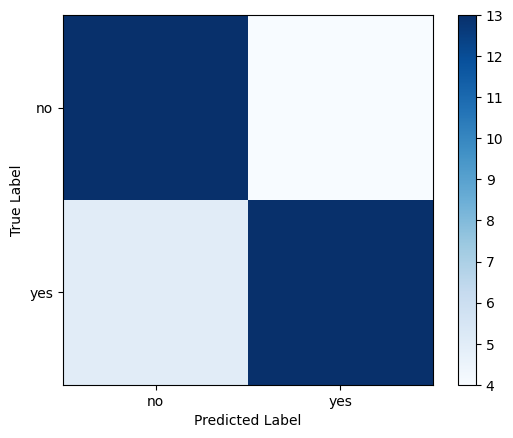

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred = np.squeeze(y_pred)
cm = confusion_matrix(y_test, y_pred)


# Display confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_mapping))
plt.xticks(tick_marks, label_mapping.keys())
plt.yticks(tick_marks, label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(cm)

[[13  4]
 [ 5 13]]
